# K-means Clustering

You are given a dataset file `data.csv` of 360 records, hence there are 360 lines in total in the text file `data.csv`. Each record in `data.csv` is a vector of 2577 elements of which the first 2576 elements represent data features and the last element in each record represents class id. For each record features are nothing but integer values in the range of `[0, 255]` representing intensities of pixels of a 2D image of size `56 x 46` (height x width) of a subject. The data is acquired from 40 subjects with 9 images from each subject. The class id for each subject is a unique integer number in the range of `[1,40]`. Please note that after loading, features are normalized to range `[0,1]` (see `load_dataset`). You are also provided with a Jupyter notebook which you can use to answer the test questions.

In [1]:
%matplotlib inline
import matplotlib.pyplot as pl
import numpy as np

In [2]:
def load_dataset(data='./dataset/data.csv'):
    """
    Loads and returns train and test datasets.
    """
    data = np.genfromtxt(fname=data, delimiter=',')
    y = data[:,data.shape[1]-1].astype(np.int)
    x = data[:,:data.shape[1]-1] / 255.0
    return (x, y)

The following script calls function `load_dataset` to load dataset (`x`) and corresponding class ids (`y`).

In [3]:
x, y = load_dataset()

Each row of `x` is a 1D vector comprised of 2576 (56 x 46) real numbers in `[0,1]` and corresponds to a face image of an subject. The following function takes a 1D vector array as input and returns the corresponding 2D representation as image.

In [4]:
def vector2image(image_vector, image_height=56, image_width=46):
    """
    Returns image representation of the input 1D vector.
    """
    image = np.reshape(image_vector, (image_height, image_width))
    return image

Now you can use `vector2image` function to convert a 1D feature vector to 2D image for visualisation purposes. The following script displays `x[0]` as image.

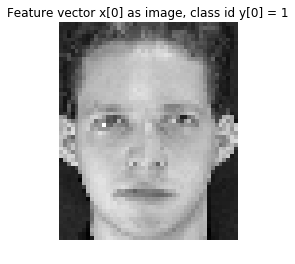

In [5]:
record_index = 0
image = vector2image(x[record_index])
pl.figure()
pl.imshow(image, cmap='gray')
pl.title('Feature vector x[{:d}] as image, class id y[{:d}] = {:d}'.format(record_index, record_index, y[record_index]))
pl.axis('off')
pl.show()

You are also provided with an implementation of _K_-means clustering algorithm as a template. Use this template and modify some of its member functions to answer some of the test questions. 

In [9]:
class Kmeans:
    def __init__(self, x, c, suppress_output=False, display_interval=10):
        self.reset(x, c, suppress_output, display_interval)        
    
    def reset(self, x, c, suppress_output, display_interval):
        self.x = x # input dataset
        self.c = c.copy() # initial cluster centroids                         
        self.N = x.shape[0] # the number of data points
        self.K = c.shape[0] # the number of clusters (K)        
        self.a = np.zeros(self.N, dtype=np.int) # class assignment vector
        self.a_previous = np.ones(self.N, dtype=np.int) # class assignment vector from the previous iteration
        self.distance_matrix = np.zeros((self.N, self.K), dtype=np.float) # each column of this matrix is represents distances of data points from the corresponding cluster centroid        
        self.max_iteration = 100 # used for convergence
        self.current_iteration = 0 # keeps track of the iterations
        self.J = 0.0 # keeps the track of cost function  due to cluster updates
        self.suppress_output = suppress_output # this is to suppress outputs
        self.display_interval = display_interval # used for displaying intermediate results, such as cost function
    
    def distance(self, x, ck):
        return np.sqrt(np.sum((x-ck)**2, axis=1))        
        
    def assignment(self):
        # calculate distances of data points from each cluster centroid
        for k in np.arange(self.K):
            self.distance_matrix[:, k] = self.distance(self.x, self.c[k])
        # associate each data point to the clossest cluster centroid 
        self.a = np.argmin(self.distance_matrix, axis=1)
        self.J = np.mean(np.min(self.distance_matrix, axis=1))
    
    def updateA(self):
        # update cluster centroids
        for k in np.arange(self.K):            
            self.c[k] = np.mean(self.x[self.a == k], axis=0)
            
    def update(self):
        for k in np.arange(self.K):            
            d = np.mean(self.x[self.a == k], axis=0)
            t = np.argmin(self.distance(self.x[self.a == k], d))
            self.c[k] = self.x[self.a == k][t]
        
    def is_converged(self):
        if (self.current_iteration <= self.max_iteration):
            return False
        else:
            return True
    
    def show_cluster_centroids(self, nrows=1, ncols=4, save=''):
        pl.figure()
        for k in np.arange(self.K):
            image = vector2image(self.c[k])
            pl.subplot(nrows, ncols, (k+1))
            pl.imshow(image, cmap='gray')
            pl.title('c[{:d}]'.format(k), fontsize=16)
            pl.axis('off')
        if save:
            pl.savefig(save, dpi=300, bbox_inches='tight')
        pl.show()
            
    def run(self):        
        while not self.is_converged():
            self.a_previous = self.a.copy()            
            self.assignment()  
            if not self.suppress_output and (self.current_iteration%self.display_interval == 0):
                msg = 'iteration # = {:4d}, J = {:12.4f}'.format(self.current_iteration, self.J)            
                print(msg)
            self.update()
            self.current_iteration += 1

iteration # =    0, J =       9.3239
iteration # =   10, J =       6.8557
iteration # =   20, J =       6.8294
iteration # =   30, J =       6.8294
iteration # =   40, J =       6.8294
iteration # =   50, J =       6.8294
iteration # =   60, J =       6.8294
iteration # =   70, J =       6.8294
iteration # =   80, J =       6.8294
iteration # =   90, J =       6.8294
iteration # =  100, J =       6.8294


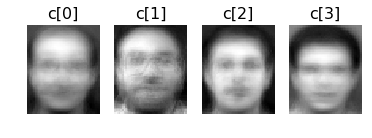

In [7]:
#Question 1
c = x[281]
c = np.vstack((c, x[213]))
c = np.vstack((c, x[177]))
c = np.vstack((c, x[72]))

km = Kmeans(x, c)
km.run()
km.show_cluster_centroids()

iteration # =    0, J =       9.1840
iteration # =   10, J =       6.5303
iteration # =   20, J =       6.5295
iteration # =   30, J =       6.5295
iteration # =   40, J =       6.5295
iteration # =   50, J =       6.5295
iteration # =   60, J =       6.5295
iteration # =   70, J =       6.5295
iteration # =   80, J =       6.5295
iteration # =   90, J =       6.5295
iteration # =  100, J =       6.5295


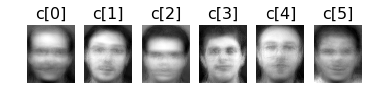

In [8]:
#Question 2
c = x[306]
c = np.vstack((c, x[175]))
c = np.vstack((c, x[149]))
c = np.vstack((c, x[317]))
c = np.vstack((c, x[234]))
c = np.vstack((c, x[296]))

km = Kmeans(x, c)
km.run()
km.show_cluster_centroids(nrows=1, ncols=6)

iteration # =    0, J =      10.0779
iteration # =   10, J =       8.3444
iteration # =   20, J =       8.3444
iteration # =   30, J =       8.3444
iteration # =   40, J =       8.3444
iteration # =   50, J =       8.3444
iteration # =   60, J =       8.3444
iteration # =   70, J =       8.3444
iteration # =   80, J =       8.3444
iteration # =   90, J =       8.3444
iteration # =  100, J =       8.3444


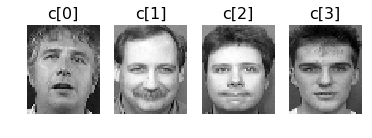

In [10]:
#Question 3
c = x[306]
c = np.vstack((c, x[175]))
c = np.vstack((c, x[149]))
c = np.vstack((c, x[317]))

km = Kmeans(x, c)
km.run()
km.show_cluster_centroids()

iteration # =    0, J =       8.9242
iteration # =   10, J =       8.0746
iteration # =   20, J =       8.0746
iteration # =   30, J =       8.0746
iteration # =   40, J =       8.0746
iteration # =   50, J =       8.0746
iteration # =   60, J =       8.0746
iteration # =   70, J =       8.0746
iteration # =   80, J =       8.0746
iteration # =   90, J =       8.0746
iteration # =  100, J =       8.0746


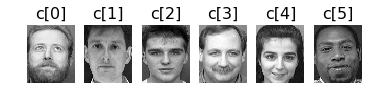

In [11]:
#Question 4
c = x[281]
c = np.vstack((c, x[213]))
c = np.vstack((c, x[177]))
c = np.vstack((c, x[72]))
c = np.vstack((c, x[82]))
c = np.vstack((c, x[194]))

km = Kmeans(x, c)
km.run()
km.show_cluster_centroids(nrows=1, ncols=6)

In [12]:
def find_principal_components(x, suppress_output=False):
    """
    Finds and returns the principal components.
    """
    N = x.shape[0]
    D = x.shape[1]
    mu = np.mean(x, axis = 0)
    image = vector2image(mu)
    pl.figure()
    pl.imshow(image, cmap='gray')
    pl.title('Feature vector x[{:d}] as image, class id y[{:d}] = {:d}'.format(record_index, record_index, y[record_index]))
    pl.axis('off')
    pl.show()
    #C = 1.0 / (N-1) * np.dot(x.T, x)
    print(N)
    print(D)
    C = 1.0 / (N-1) * np.dot((x - mu).T, (x - mu))
    print(N, D, C.shape)
    print(C)
    LD, PD = np.linalg.eigh(C) # note that this produces eigenvalues (LD) and corresponding eigenvectors (PD) sorted in ascending order of eigenvalues
    LD = LD[::-1] # reverse LD
    PD = PD[:, ::-1] # reverse PD    
    if not suppress_output:
        pl.figure('Selected Eigenvalues')
        pl.plot(LD)
        pl.xlabel('Eigenvalue #')
        pl.ylabel('Eigenvalue')    
    return (mu, PD, LD)

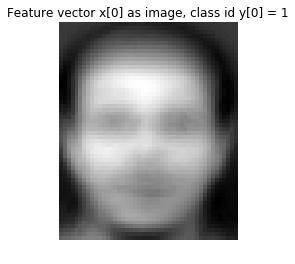

360
2576
360 2576 (2576, 2576)
[[ 0.01938314  0.01930589  0.01916358 ... -0.00076458 -0.00220163
  -0.00056097]
 [ 0.01930589  0.01945173  0.01919658 ... -0.0006151  -0.00209058
  -0.00029035]
 [ 0.01916358  0.01919658  0.01928928 ... -0.0007567  -0.00207191
  -0.0004211 ]
 ...
 [-0.00076458 -0.0006151  -0.0007567  ...  0.03027071  0.0267042
   0.02374028]
 [-0.00220163 -0.00209058 -0.00207191 ...  0.0267042   0.03335891
   0.02710059]
 [-0.00056097 -0.00029035 -0.0004211  ...  0.02374028  0.02710059
   0.02934392]]


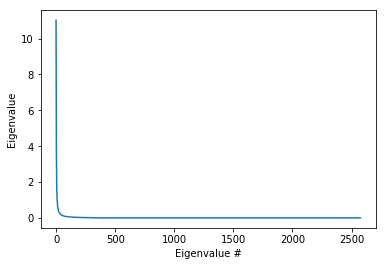

In [13]:
mu, PD, LD = find_principal_components(x)

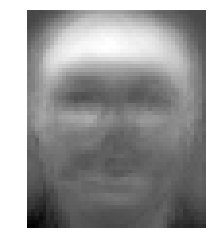

11.02273473303474


In [15]:
for i in range(1):
    image = vector2image(PD[:, i])
    pl.figure()
    pl.imshow(image, cmap='gray')
    pl.axis('off')
    pl.show()
print(LD[0])

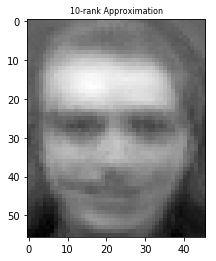

In [16]:
Pd = PD[:, 0:10]
W = np.array([2.68, 0.79, 1.21, -1.79, 1.71, 0.53, -3.43, 0.52, 2.34,-0.47])
x_reconstructed = mu + np.dot(W, Pd.T)
# x_residual = x_original - x_reconstructed
pl.figure()
# pl.subplot(1, 3, 1)
# pl.imshow(vector2image(x_original), cmap='gray')
# pl.title('Original Data', fontsize=8)
# pl.subplot(1, 3, 2)
pl.imshow(vector2image(x_reconstructed), cmap='gray')
pl.title('{:}-rank Approximation'.format(10), fontsize=8);
# pl.subplot(1, 3, 3)
# pl.imshow(vector2image(x_residual), cmap='gray')
# pl.title('Residual Image, MSE={:.4f}'.format(np.sqrt(np.mean(x_residual**2))), fontsize=8)